In [12]:
%matplotlib inline

from modsim import *



In [13]:
#using data from http://www.elephantdatabase.org/report/1995/Africa 
#only recorded "definite" statistics

elephant_database = TimeSeries()

elephant_database[1995] = 286.233
elephant_database[1998] = 301.733
elephant_database[2002] = 402.067
elephant_database[2007] = 472.269
elephant_database[2013] = 401.732


##pop_array = (286.233,301.733,402.067,472.269,401.732,352.271)
##year_array = (1995,1998,2002,2007,2013,2014)
       

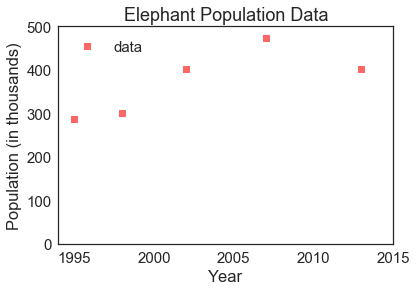

In [14]:
def plot_data(x_start=1994, x_end=2015, y_start=0, y_end=500):
  
    plot(elephant_database, 'rs', label='data')
    ylim([y_start,y_end])
    xlim([x_start,x_end])
    decorate(title='Elephant Population Data', xlabel='Year', ylabel='Population (in thousands)', label='data')

plot_data()

In [15]:
def fit_curve(a=-1.1287, b=28.674, c=262.15,
            year_start=1994, year_end=2015):
    
    #year_start and year_end indicate the years to which the model will apply
    
    
    pop_fit = TimeSeries()
    
    for t in linspace(year_start, year_end, 100):
        pop_fit[t] = a * (t-1995)**2 + b * (t-1995) + c
        
    return pop_fit

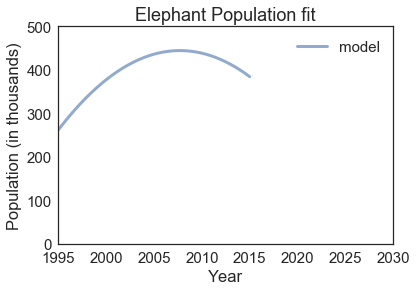

In [16]:
def plot_curve(x_start=1995, x_end=2030, y_start=0, y_end=500):
    
    plot(fit_curve(), label='model')
    ylim([y_start,y_end])
    xlim([x_start,x_end])
    decorate(title='Elephant Population fit', xlabel='Year', ylabel='Population (in thousands)')
    
plot_curve()

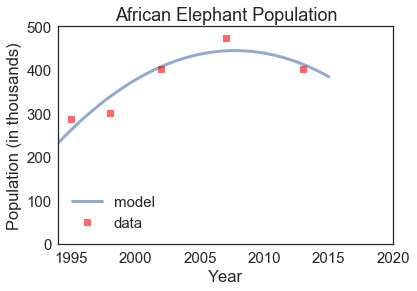

In [17]:
def plot_all(x_start=1994, x_end=2020, y_start=0, y_end=500):
    
    newfig()
    plot_curve(x_start, x_end, y_start, y_end)
    plot_data(x_start, x_end, y_start, y_end)
    decorate(title='African Elephant Population', xlabel='Year', ylabel='Population (in thousands)')
    
plot_all()

In [18]:
system = System(t0 = 2013, tn = 2200, pop = elephant_database[2013],
               poaching_rate = 0.074, birth_rate = 0.05)

elephant_future = TimeSeries()
elephant_future[2013] = 401.732


def run_simulation(system):
    elephant_boom = TimeSeries()
    for i in linrange(system.t0, system.tn):
        births = system.birth_rate * elephant_future[i]
        deaths = system.poaching_rate * elephant_future[i]
        elephant_future[i+1] = births - deaths + elephant_future[i]
    system.elephant_boom = elephant_future

run_simulation(system)

48.5367355922


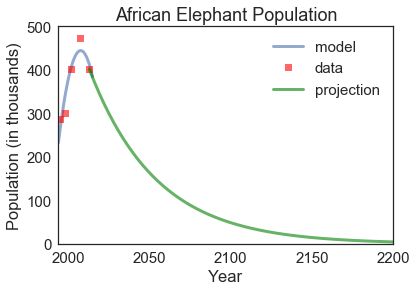

In [19]:
def plot_all(x_start=1994, x_end=2200, y_start=0, y_end=500, year_estimate=2100):

    newfig()
    plot_curve(x_start, x_end, y_start, y_end)
    plot_data(x_start, x_end, y_start, y_end)
    plot(system.elephant_boom, 'g-', label='projection')
    decorate(title='African Elephant Population', xlabel='Year', ylabel='Population (in thousands)')
    
    print(system.elephant_boom[year_estimate])
    
plot_all()

In [20]:
poaching_array = linspace(system.poaching_rate-.074, system.poaching_rate+.074, 10)
poaching_array

array([ 0.        ,  0.01644444,  0.03288889,  0.04933333,  0.06577778,
        0.08222222,  0.09866667,  0.11511111,  0.13155556,  0.148     ])

In [21]:
def poaching_sweep(num_points = 10):
  
    newfig()
    poaching_array = linspace(system.poaching_rate-.024, system.poaching_rate+.024, num_points)
 
    for rate in poaching_array:
       
        slop = System(t0 = 2013, tn = 2200, pop = elephant_database[2013],
               poaching_rate = rate, birth_rate = 0.05)
        run_simulation(slop)
        
        plot(slop.poaching_rate, system.elephant_boom[2100], 'gs')
        decorate(title='2100 Population', xlabel='Poaching Rate', ylabel='Final Population (in thousands)')

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


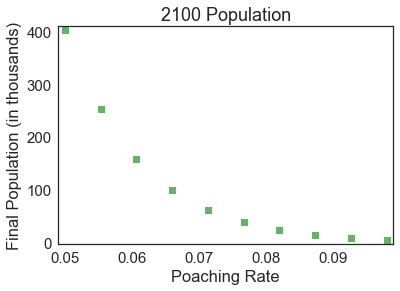

In [22]:
poaching_sweep()